# HW 31
## James Camacho

**Task: Verify Example 10.9.**

Consider the upwind method for $a>0$:

$$U^{n+1}_j = U^n_j - \frac{ak}{h}\left(U^n_j - U^n_{j-1}\right).$$

We want to verify that it is first-order accurate for the equation $u_t+au_x = 0$ and second-order accurate for the equation $u_t + au_x = \frac{1}{2}ah\left(1-\frac{ak}{h}\right)u_{xx}.$

We verify it is first-order accurate for $u_t+au_x = 0$ using the equation $u(x, t) = \sin(x - at)$.

In [79]:
import numpy as np
import matplotlib.pyplot as plt

a = 2
def true_u(x, t):
    return np.sin(x - a*t)

def upwind(u, x, h, k=0.01):
    t = 0
    while t < 1:
        left = true_u(x[0] - h, t)
        u = u - a*k/h * (u - np.concatenate([[left], u[:-1]]))
        t += k
    return u, t

In [80]:
ks = []
es = []
for k in [0.1, 0.05, 0.02, 0.01, 0.005]:
    h = 5*k
    x = np.arange(int(1/h)) * h
    u = true_u(x, 0)
    u, t = upwind(u, x, h, k)
    ks.append(k)
    es.append(np.linalg.norm(u-true_u(x, t), ord=np.inf))
print(es)

[0.1344476377240269, 0.06457546598084729, 0.025557905956121396, 0.012708400411955756, 0.006333625895006079]


Order:
[1.05798635 1.01156524 1.00798718 1.00467889]


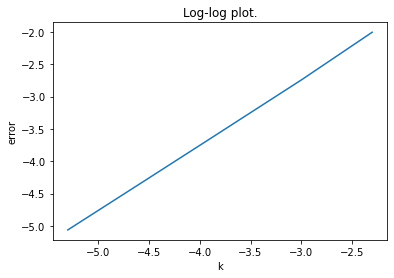

In [81]:
plt.title("Log-log plot.")
plt.xlabel("k")
plt.ylabel("error")
plt.plot(np.log(ks), np.log(es))
log_e = np.log(es)
log_k = np.log(ks)
print("Order:")
print((log_e[1:] - log_e[:-1]) / (log_k[1:] - log_k[:-1]))

We verify it is second-order accurate for $v_t + av_x = \frac12ah\left(1-\frac{ak}{h}\right)v_{xx}$ using the equation $v(x, t) = e^{-\nu t}\left[\sin(x - at) + \cos(x-at)\right]$ where $\nu = \frac12ah\left(1-\frac{ak}{h}\right).$ Note that we have

$$v_t = e^{-\nu t}\left[(a-\nu)\sin(x-at) - (a+\nu)\cos(x-at)\right],$$

$$av_x = e^{-\nu t}\left[-a\sin(x-at) + a\cos(x-at)\right],$$

so $v_t + av_x = -\nu v,$ and obviously $\nu v_{xx} = -\nu v,$ so this is a true solution.

In [82]:
a = 2
def true_v(x, t, h, k):
    nu = 0.5 * a * h * (1 - a*k/h)
    return np.exp(-nu*t) * (np.sin(x-a*t) + np.cos(x-a*t))

def upwind(u, x, h, k=0.01):
    t = 0
    while t < 1:
        left = true_v(x[0] - h, t, h, k)
        u = u - a*k/h * (u - np.concatenate([[left], u[:-1]]))
        t += k
    return u, t

In [83]:
ks = []
es = []

for k in [0.01, 0.005, 0.002, 0.001, 0.0005]:
    h = 5*a*k
    x = np.arange(int(1/h)) * h
    u = true_v(x, 0, h, k)
    u, t = upwind(u, x, h, k)
    ks.append(k)
    es.append(np.linalg.norm(u-true_v(x, t, h, k), ord=np.inf))
print(es)

[0.001014870320166672, 0.0002648583137434546, 4.3472957239609755e-05, 1.0960873517595893e-05, 2.7512512605354367e-06]


Order:
[1.93800269 1.97214256 1.98775546 1.99420297]


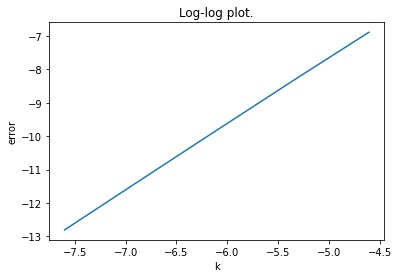

In [84]:
plt.title("Log-log plot.")
plt.xlabel("k")
plt.ylabel("error")
plt.plot(np.log(ks), np.log(es))
log_e = np.log(es)
log_k = np.log(ks)
print("Order:")
print((log_e[1:] - log_e[:-1]) / (log_k[1:] - log_k[:-1]))